Кузнецов Никита, группа Б05-023

# Поиск наименее плотного разреза

__Задача:__

&emsp;Требуется разбить вершины графа на 2 группы, так чтобы отношение числа рёбер между ними к размеру меньшей группы было как можно меньше. Имплементировать алгоритм Лейтона-Рао приближённого решения с точностью $O(\log{n})$.

__Аннотация:__

&emsp;В данной работе рассмотрена задача поиска наименее плотного разреза. Реализован алгоритм Лейтона-Рао поиска приближённого решения, показана его корректность и продемонстрированы результаты работы на некоторых тестовых данных.

## Введение

&emsp;Наименее плотным разрезом графа называется разрез, имеющий минимальную плотность. Задача нахождения такого разреза имеет множество применений в жизни. Часто для какой-либо сети с определённым спросом между каждой парой верщин (на поток сообщений, трафик и т.д.) и пропускной способностью на каждом ребре одна из самых сложных задач заключается в том, чтобы определить разрез, в котором отношений пропускной способности разреза к спросу по всему разделу минимально. Такая задача встречается в кластерном анализе и проектировании телекоммуникационных сетей.
    
&emsp;Данная задача является NP-трудной. Для экономии времени на практике используется алгоритм Лейтона-Рао приближённого вычисления решения, который я рассмторю ниже.

## Задача поиска наименее плотного разреза

&emsp;Определим формально понятие разреза.

&emsp;<u>Опр</u>. __Разрез__ графа $G$ - разбиение множества его вершин $V(G)$ на два множества $A$ и $B$, такие что:<br>
    &emsp;1. $A \subset V(G)$, $B \subset V(G)$<br>
    &emsp;2. $A \not= \emptyset$, $B \not= \emptyset$<br>
    &emsp;3. $A \cap B = \emptyset$<br>
    &emsp;4. $A \cup B = V(G)$
    
&emsp;Положим $G = (V, E)$ - неориентированный граф, множества $S$ и $V \backslash S$ образуют разрез графа. Обозначим этот разрез как $(S, V \backslash S)$.

&emsp;<u>Опр</u>. __Плотность__ разреза - величина $\frac{|Edges(S, V \backslash S)|}{|S||V \backslash S|}$, где $Edges(S, V \backslash S) = \{ (u, v) \in E | u \in S, v \in V \backslash S \}$.

__<u>Теорема</u>.__

&emsp; Задача $SCP$ поиска минимального разреза является $NP$-трудной.

__Доказательство:__[1]

&emsp;Заметим, что задача поиска разреза минимальной плотности и задача поиска разреза максимальной плотности эквивалентны по сложности. Следовательно, для доказательства теоремы достаточно показать, что задача максимального разреза $MAXCUT$ сводится к задаче поиска разреза максимальной плотности, так как $MAXCUT$ - $NP$-трудная. 

&emsp;По заданному графу $G$ построим граф $G^*$, имеющий $2n$ вершин и состоящий из графа $G$ и непересекающейся с ним изоморфной копии графа $G$ - $G'$. Для каждой пары вершин $i \in V(G)$ и $i' \in V(G')$ вставим ребро в $E(G^*)$ с весом $M$ между ними. Тогда для достаточно большого $M$ разрез максимальной плотности будет $(S, V(G^*) \backslash S)$, где $|S| = |V(G^*)| = n$, так как только такие разрезы имеют плотность больше, чем $\frac{M}{n}$. Разрез максимальной плотности $(S, V(G^*) \backslash S)$ в $G^*$ имеет плотность $\frac{nM + 2k}{n^2}$, где $k$ величина макисмального разреза в G, и $(S \cap V(G), V(G^*) \backslash S \cap V(G))$ представляет собой максимальный разрез исходного графа $G$.

&emsp;Значит, для точного решения задачи на данный момент известны только долго работающие алгоритмы, поэтому будем искать решение приближённо.

## Алгоритм Лейтона-Рао поиска приближённого решения

&emsp;<u>Опр</u>. __Разреженность__ разреза $(S, V \backslash S)$ графа $G$ - величина $\phi_G(S) = \frac{\frac{1}{|E|} |Edges(S, V \backslash S)|}{\frac{2}{|V|^2} |S||V \backslash S|}$.

Другой способ записать разреженность разреза:

$\frac{|V|^2}{2|E|} \frac{\sum_{i,j} A_{i,j} |I_S(i) - I_S(j)|}{\sum_{i,j} |I_S(i) - I_S(j)|}$, где A - матрица смежности графа $G$, а $I_S(i)$ - индикаторная функция множества $S$.

Положим:

$\phi(G) = \min_{\emptyset\not=V\subset S} \psi_G(S)$

&emsp;<u>Опр</u>. __Полуметрикой__ на множестве $M$ называется функция $d: M \times M \rightarrow \mathbb R$, если для любых точек $x$, $y$, $z$ из $M$ она удовлетворяет следующим условиям:<br>
&emsp;1. $d(x, x) = 0$<br>
&emsp;2. $d(x, y) = d(y, x)$<br>
&emsp;3. $d(x, y) \leq d(x, z) + d(y, z)$

Понятно, что $d(i, j) = |I_S(i) - I_S(j)|$ является полуметрикой.

&emsp;Релаксация Лейтона-Рао получается, если мы будем использовать не полуметрику $d(i, j)$, а некоторую другую полуметрику. Мы можем взять минимум разреженности разреза по всем полуметрикам:

$LR(G) = \min_{d: V \times V \rightarrow \mathbb R, d - полуметрика} \frac{|V|^2}{2|E|} \frac{\sum_{i,j} A_{i,j} d(i, j)}{\sum_{i,j} d(i, j)}$

&emsp;Может показаться, что это слишком большое послабление, что существуют графики, на которых $LR(G)$ не имеет никакой связи с $\phi(G)$, однако мы докажем довольно хорошую оценку, покажем, что $LR(G)$ и оптимальное $d(.,.)$ могут быть найдены за полиномиальное время, из чего будет следовать полиномиальный приближенный алгоритм решения задачи.

&emsp;Сформулируем релаксацию Лейтона-Рао в виде задачи линейного программирования:

$minimize \sum_{i,j} A_{i,j} d(i, j)$

$subject \; to \sum_{i,j} d(i, j) = \frac{|V|^2}{2|E|}$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; d(i, k) \leq d(i, j) + d(j, k) \; \forall i, j, k \in V$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; d(i, j) \geq 0 \; \forall i \in V$

&emsp;Очевидно, что все решения задачи линейного программирования являются решениями $LR(G)$. Кроме того, каждая полуметрика может быть нормализована так, что $\sum_{i,j} d(i, j) = \frac{|V|^2}{2|E|}$, путем домножения расстояний на некоторые константы, и эта нормализация не повлияет на значение $LR(G)$.

__<u>Теорема</u>.__ Об оценке $\phi(G)$.

&emsp;$LR(G) \leq \phi(G) \leq O(\log(|V|) LR(G)$

&emsp;Для доказательства данной теоремы нам потребуются ещё два факта, их доказательства приведены в [2].

__<u>Лемма</u>.__ Об оптимальности $l^1$ полуметрик.

&emsp;Для любого графа $G$ выполнено: $\phi(G) = \phi_1(G)$, где $\phi_1(G) = \inf_{m, f: V \rightarrow \mathbb R^{m}} \frac{|V|^2}{2|E|} \frac{\sum_{i,j} A_{i,j} \lVert f(i) - f(j) \rVert_1}{\sum_{i,j} \lVert f(i) - f(j) \rVert_1}$. Кроме того, существует полиномиальный алгоритм, который по заданному $f$ находит разрез S, такой что $\phi_G(S) \leq \frac{|V|^2}{2|E|} \frac{\sum_{i,j} A_{i,j} \lVert f(i) - f(j) \rVert_1}{\sum_{i,j} \lVert f(i) - f(j) \rVert_1}$.

__<u>Теорема</u>.__ Теорема Бургейна.

&emsp;Пусть $d: V \times V \rightarrow \mathbb R$ - полуметрика, определенная на конечном множестве V. Тогда существует отображение $f: V \rightarrow \mathbb R$, такое что для любых двух элементов $u, v \in V$:

$\lVert f(u) - f(v) \rVert_1 \leq d(u, v) \leq \lVert f(u) - f(v) \rVert_1 c \log(|V|)$, где $c$ - некоторая константа. По данной $d$ отображение $f$ может быть найдено с высокой вероятностью рандомизированным алгоритмом за полиномиальное время от $|V|$.

__Доказательство__ теоремы об оценке $\phi(G)$__:__

&emsp;$LR(G) \leq \phi(G)$. Неравенство очевидно, так как минимум по всему множеству не больше минимума по его подмножеству.

&emsp;$\phi(G) \leq O(\log(|V|) LR(G)$. Пусть $LR(G)$ достигается на полуметрике g, а $f$ - соответствующее отображение из теоремы Бургейна. Тогда:

$\phi(G) = \phi_1(G) \leq \frac{|V|^2}{2|E|} \frac{\sum_{i,j} A_{i,j} \lVert f(i) - f(j) \rVert_1}{\sum_{i,j} \lVert f(i) - f(j) \rVert_1} \leq \frac{|V|^2}{2|E|} \frac{\sum_{i,j} A_{i,j} g(i, j)}{\sum_{i,j} \frac{1}{c \log(|V|)} g(i, j)} = С \log(|V|) LR(G)$.

&emsp;Первое равенство выполнено по лемме об оптимальности $l^1$ полуметрик, последнее неравенство следует из теоремы Бургейна. Это завершает доказательство оценки точности теоремы об оценке.

## Реализация алгоритма Лейтона-Рао

In [124]:
import cvxpy as cvx
import matplotlib.pyplot as plt
import networkx
import numpy as np
import scipy.stats as sps

from itertools import product

In [117]:
class Graph:
    def __init__(self):
        pass
    
    def init_graph(self, edges):
        self.n = np.max(np.array(edges)) + 1
        self.edges = sorted(edges)
        
        self.adjacency_matrix = np.zeros((self.n, self.n))
        for (i, j) in self.edges:
            self.adjacency_matrix[i][j] = 1
            self.adjacency_matrix[j][i] = 1
        
    def init_random_graph(self, n, p):
        self.n = n
        self.p = p
        
        self.edges = list()
        for (i, j) in product(range(self.n), range(self.n)):
            if i < j:
                if sps.bernoulli.rvs(p, size=1):
                    self.edges.append((i, j))
        self.edges = sorted(self.edges)
        
        self.adjacency_matrix = np.zeros((self.n, self.n))
        for (i, j) in self.edges:
            self.adjacency_matrix[i][j] = 1
            self.adjacency_matrix[j][i] = 1

In [17]:
def leighton_rao(graph):
    adjacency_matrix_cvx = cvx.Constant(graph.adjacency_matrix)
    semimetric = cvx.Variable((graph.n, graph.n))
    
    task = cvx.Minimize(cvx.sum(cvx.multiply(adjacency_matrix_cvx, semimetric)))
    
    constraints = [cvx.sum(semimetric) == 1]
    for i in range(graph.n):
        for j in range(graph.n):
            constraints.append(semimetric[i, j] >= 0)
            for k in range(graph.n):
                constraints.append(semimetric[i, j] + semimetric[j, k] >= semimetric[i, k])
                
    problem = cvx.Problem(task, constraints)
    lr = problem.solve(solver='SCS')
    semimetric = semimetric.value
    
    return {"LR": lr, "semimetric": semimetric}

## Тестирование

Вспомогательные функции:

In [39]:
def colorize_graph(graph, semimetric):
    components = np.array(np.where(semimetric > np.mean(semimetric))).T
    
    red = {components[0, 0]}
    blue = {components[0, 1]}
    
    for i, j in components[1:]:
        if i in red:
            blue.add(j)
        elif i in blue:
            red.add(j)
        elif j in red:
            blue.add(i)
        elif j in blue:
            red.add(i)
            
    colors = list()
    for i in range(graph.n):
        if i in red:
            colors.append('r')
        else:
            colors.append('b')
    return colors

In [76]:
def plot_graph(g, node_colors):
    graph = networkx.Graph()
    graph.add_edges_from(g.edges)

    plt.figure()

    positions = networkx.spring_layout(graph)
    networkx.draw_networkx(graph, positions, nodelist=[i for i in range(g.n)], node_color=node_colors)
    plt.show()

__Простые, небольшие графы__

In [77]:
g = Graph()
g.init_graph([(0, 1)])
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

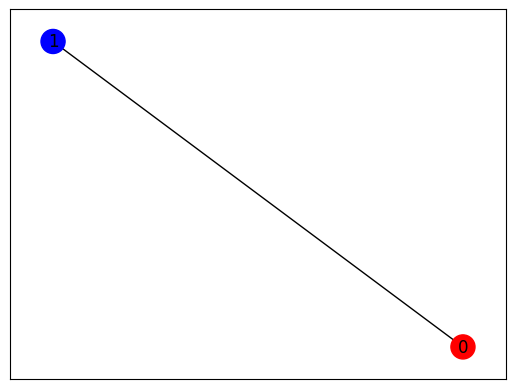

In [78]:
plot_graph(g, node_colors)

In [79]:
g = Graph()
g.init_graph([(0, 1), (0, 2)])
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

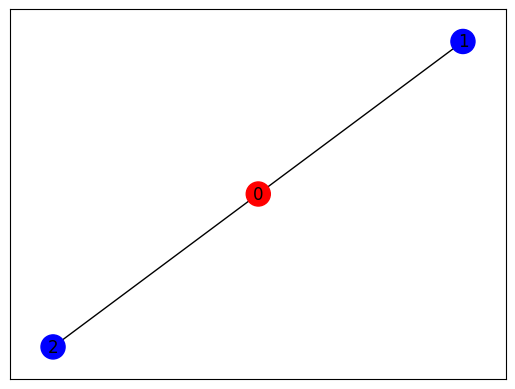

In [80]:
plot_graph(g, node_colors)

In [81]:
g = Graph()
g.init_graph([(0, 1), (0, 2), (1, 2)])
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

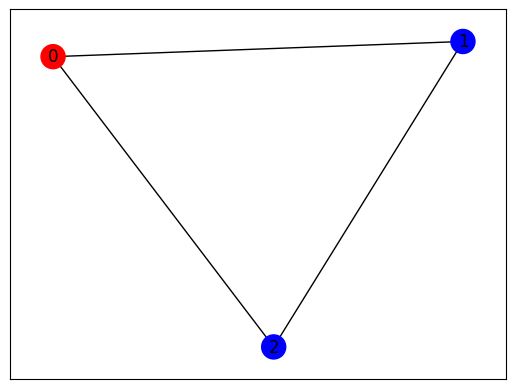

In [82]:
plot_graph(g, node_colors)

In [83]:
g = Graph()
g.init_graph([(0, 3), (1, 3), (2, 3)])
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

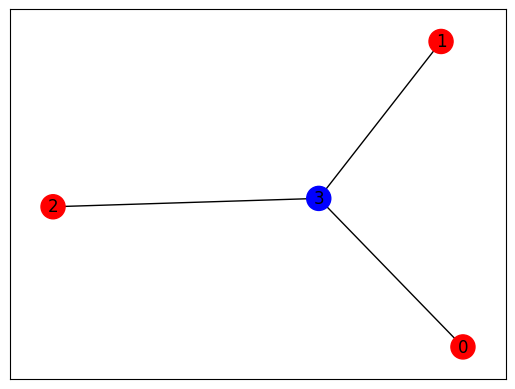

In [84]:
plot_graph(g, node_colors)

In [85]:
g = Graph()
g.init_graph([(0, 1), (1, 2), (2, 3)])
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

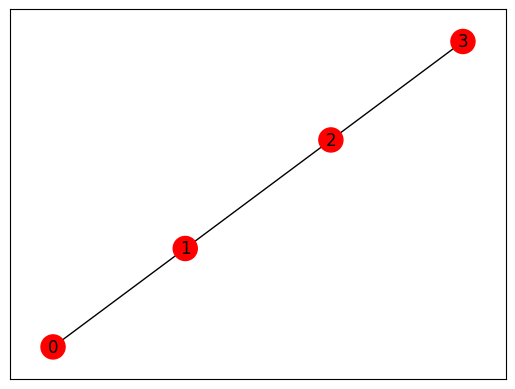

In [86]:
plot_graph(g, node_colors)

In [87]:
g = Graph()
g.init_graph([(0, 3), (3, 2), (2, 1), (1, 3)])
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

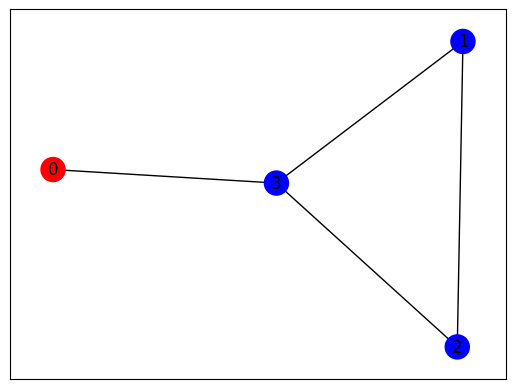

In [88]:
plot_graph(g, node_colors)

In [89]:
g = Graph()
g.init_graph([(0, 3), (3, 2), (2, 1), (1, 0)])
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

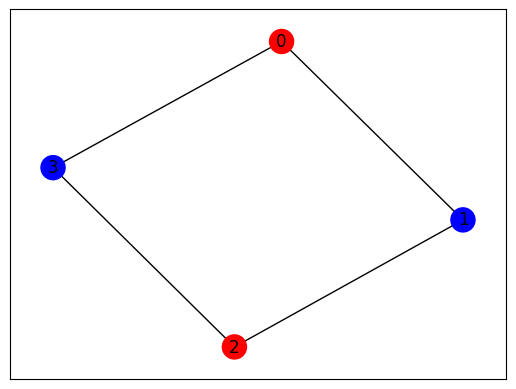

In [90]:
plot_graph(g, node_colors)

In [91]:
g = Graph()
g.init_graph([(1, 2), (2, 0), (0, 1), (2, 3), (0, 3)])
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

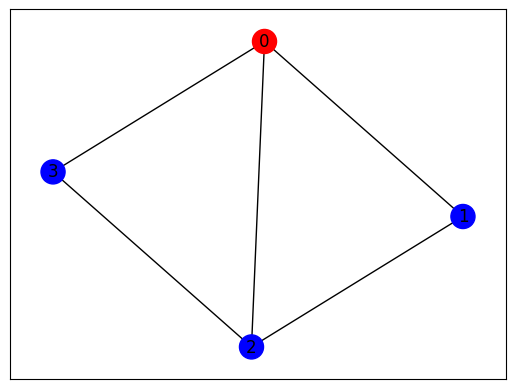

In [92]:
plot_graph(g, node_colors)

In [93]:
g = Graph()
g.init_graph([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)])
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

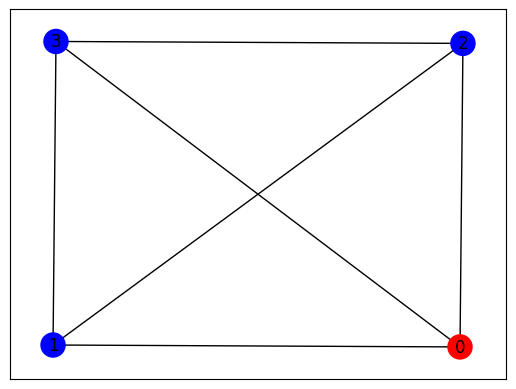

In [94]:
plot_graph(g, node_colors)

In [95]:
g = Graph()
g.init_graph([(0, 1), (0, 2), (0, 3), (0, 4)])
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

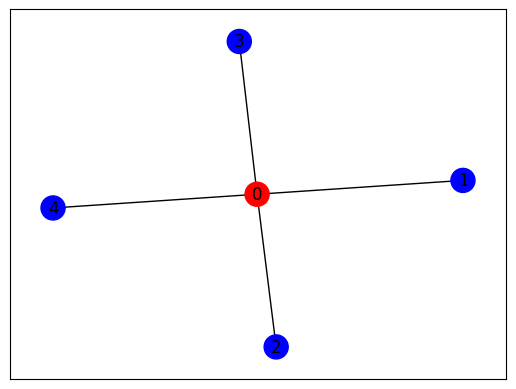

In [96]:
plot_graph(g, node_colors)

In [97]:
g = Graph()
g.init_graph([(0, 1), (1, 2), (2, 3), (2, 4)])
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

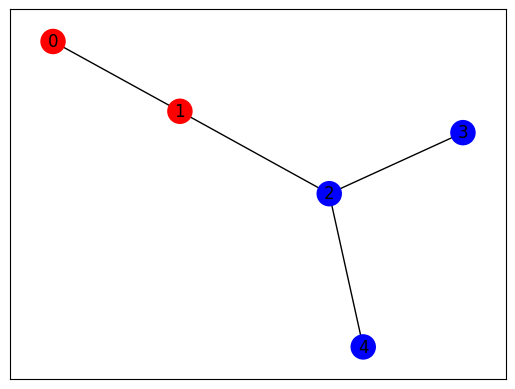

In [98]:
plot_graph(g, node_colors)

In [99]:
g = Graph()
g.init_graph([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6),
              (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)])
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

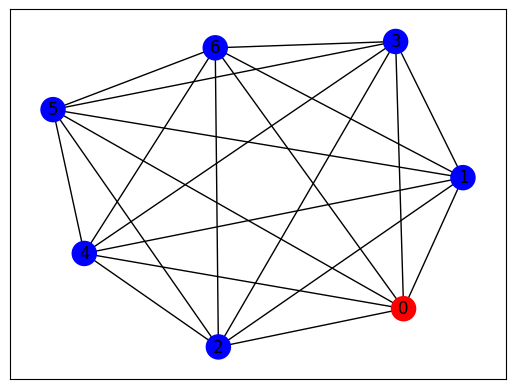

In [100]:
plot_graph(g, node_colors)

&emsp;Алгоритм часто дает неоптимальный результат на простых графах, на графах небольшого размера. Конечно, возможны случаи, когда алгоритму везет, но так происходит не всегда. Из этого можно сделать вывод, что данный алгоритм  не подходит для решения задачи на небольших графах, да еще и с требованием достаточно точного ответа.

__Две слабо связанные клики__

In [101]:
edges = list()
for (i, j) in product(range(10), range(10)):
    if i > j:
        edges.append((i, j))
for (i, j) in product(range(10, 20), range(10, 20)):
    if i > j:
        edges.append((i, j))
edges.extend([(0, 12), (3, 18), (0, 15), (0, 14), (6, 11)])

g = Graph()
g.init_graph(edges)
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

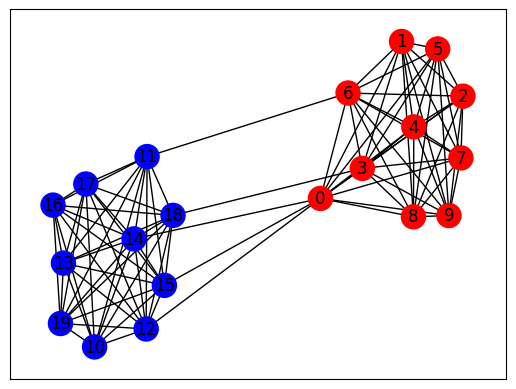

In [102]:
plot_graph(g, node_colors)

&emsp;Видим, что алгоритм в этом случае отработал хорошо и корректно, нашел точное оптимальное решение. Он сумел отделить две основные части друг от друга.

__Граф в виде гантели__

In [103]:
edges = list()
for (i, j) in product(range(10), range(10)):
    if i > j:
        edges.append((i, j))
for (i, j) in product(range(10, 20), range(10, 20)):
    if i > j:
        edges.append((i, j))
edges.extend([(i, 20) for i in range(10)])
edges.extend([(i, 21) for i in range(10, 20)])
edges.append((20, 21))

g = Graph()
g.init_graph(edges)
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

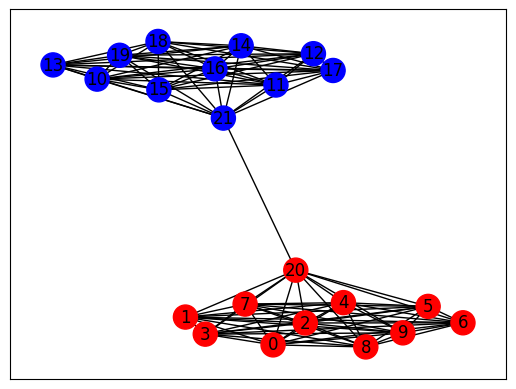

In [104]:
plot_graph(g, node_colors)

&emsp;Алгоритм снова прекрасно отработал.

__Граф леденец__

In [106]:
edges = list()
for (i, j) in product(range(50), range(50)):
    if i > j:
        edges.append((i, j))
edges.extend([(49, 50), (50, 51), (51, 52), (52, 53), (53, 54)])

g = Graph()
g.init_graph(edges)
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

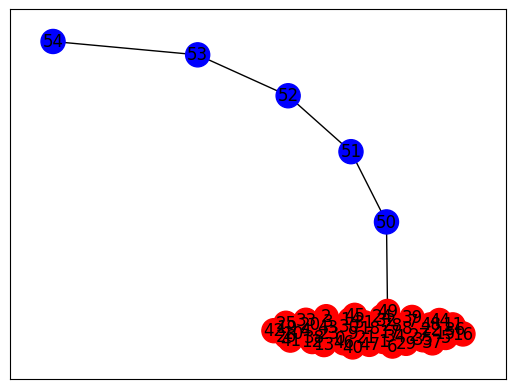

In [107]:
plot_graph(g, node_colors)

&emsp;Алгоритм снова прекрасно отработал, еще и нашел большую компоненту.

__Случайный граф на 20 вершинах с вероятностью появления ребра 0.5__

In [118]:
g = Graph()
g.init_random_graph(20, 0.5)
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

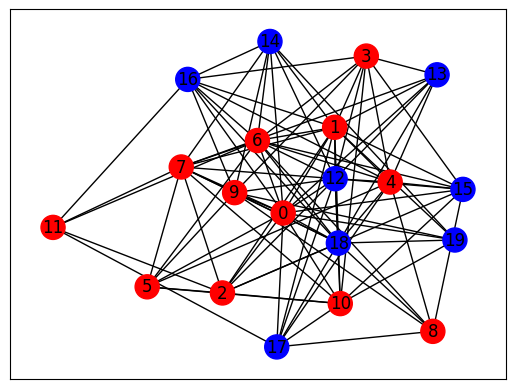

In [119]:
plot_graph(g, node_colors)

__Случайный граф на 20 вершинах с вероятностью появления ребра 0.2__

In [120]:
g = Graph()
g.init_random_graph(20, 0.2)
semimetric = leighton_rao(g)['semimetric']
node_colors = colorize_graph(g, semimetric)

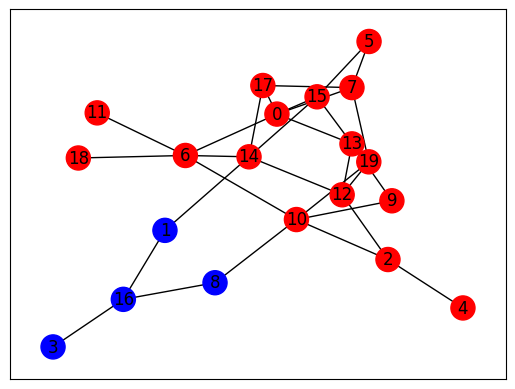

In [121]:
plot_graph(g, node_colors)

&emsp;Как видим, алгоритм находит довольно точное приближение для случайных графов.

__Изучим время работы алгоритма__

In [122]:
import time

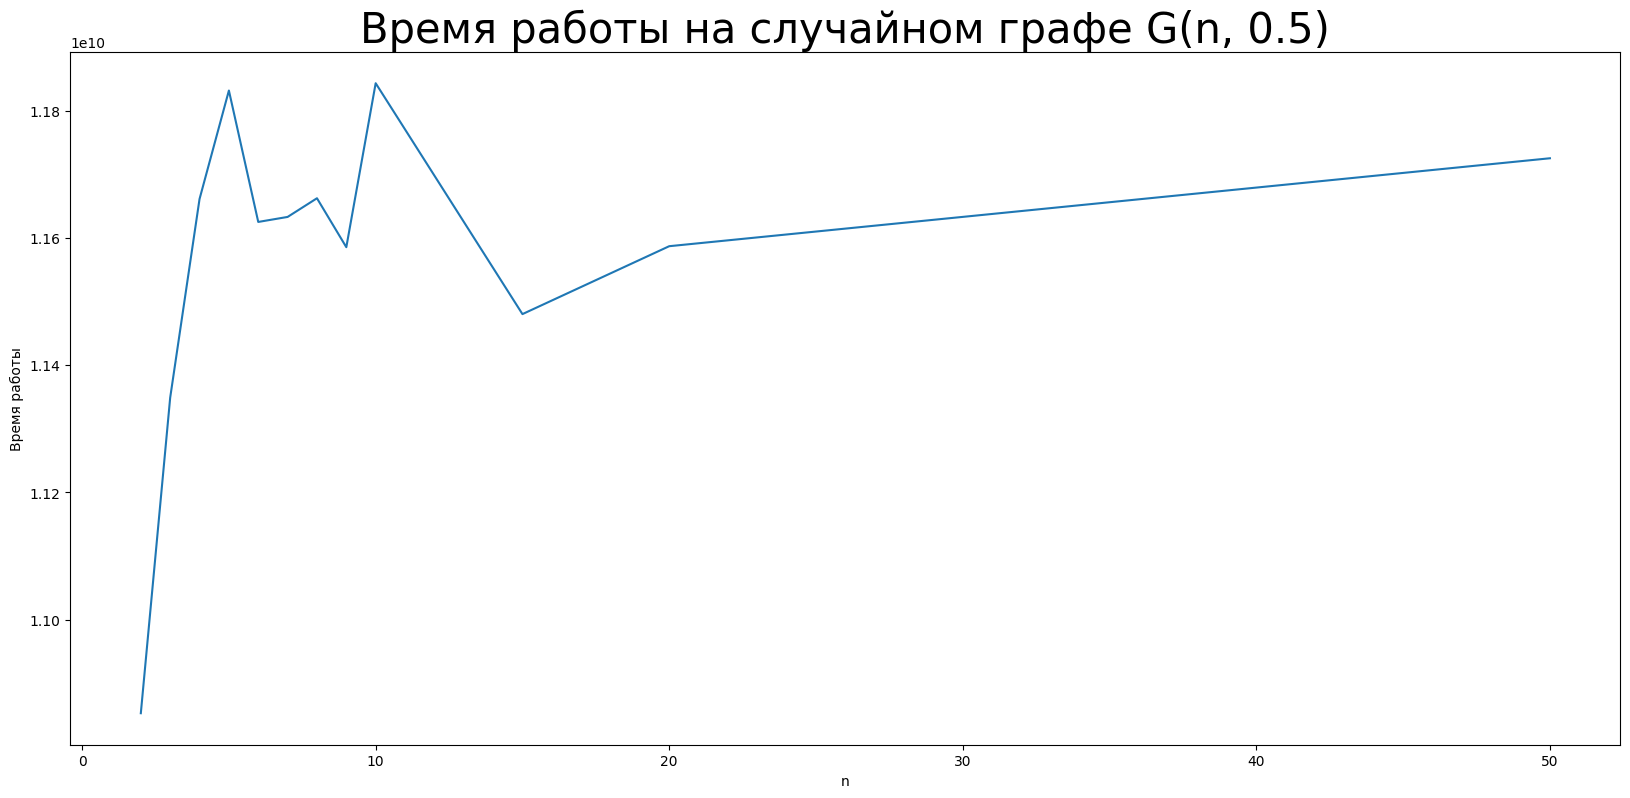

In [123]:
n = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50]
delay = []

for i in n:
    g = Graph()
    g.init_random_graph(20, 0.2)
    
    start = time.time_ns()
    semimetric = leighton_rao(g)['semimetric']
    end = time.time_ns()
    delay.append(end - start)
    
    node_colors = colorize_graph(g, semimetric)
    
plt.figure(figsize=(20, 9))
plt.title("Время работы на случайном графе G(n, 0.5)", fontsize=30)
plt.xlabel("n")
plt.ylabel("Время работы")
plt.plot(n, delay)
plt.show()

&emsp;Как видим, время работы алгоритма примерно соответствует логарифму от числа вершин: $O(\log(|V|))$

## Выводы

&emsp;Я реализовал алгоритм Лейтона-Рао поиска приближённого решения задачи о наименее плотном разрезе в графе со сложностью $O(\log(|V|))$. Как мы видим, алгоритм плохо подходит для точного решения задачи для маленьких графов небольшого размера, зато хорошо подходит для решения задачи для больших графов, для графов с двумя слабо связанными компонентами.

## Использованная литература:

    1. David W.Matula, Farhad Shahrokhi: Sparsets cuts and bottlenecks in graphs, 1990
    2. Luca Trevisan: Spectral graph theory and graph partitioning